Single comments are notes to self, double comments are usage notes

In [3]:
## notebook formatting and loading settings, imports - keep same

%matplotlib inline
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d # take out if no more
from IPython.display import display, HTML
import math
from datetime import datetime
import os, sys

sys.path.append('../src')
import scaredyrattools as sr

In [56]:
## Be sure to put r before the path
## Easiest to go to correct folder, then copy/paste its path

# just change week number every time? i think?
# need to modify for easy use on non-unix: can I find a module to do this?
inpath = '/Users/liannj/Documents/Anna/eCBData/Week5/1Habituation'

## Make sure the folder exists already. The file does not need to exist; it will be created.
outpath = '/Users/liannj/Documents/Anna/eCBData/OutputWeek5'

# Future: attempting to loop through all files in a folder. Suuuuper tbd.
filename = 'Raw data-eCB Fear Conditioning Spring 2018-Trial    82.xlsx' ## include .xlsx

# TRYING THIS BECAUSE THEY'RE ALL THE SAME
sheetlist = ['Track-Arena 1-Subject 1', 'Track-Arena 2-Subject 1', 
             'Track-Arena 3-Subject 1', 'Track-Arena 4-Subject 1']

Raw data-eCB Fear Conditioning Spring 2018-Trial    82.xlsx Track-Arena 1-Subject 1 is EF33 in Context B
Raw data-eCB Fear Conditioning Spring 2018-Trial    82.xlsx Track-Arena 2-Subject 1 is EF34 in Context B
Raw data-eCB Fear Conditioning Spring 2018-Trial    82.xlsx Track-Arena 3-Subject 1 is EF35 in Context B
Raw data-eCB Fear Conditioning Spring 2018-Trial    82.xlsx Track-Arena 4-Subject 1 is EF36 in Context B


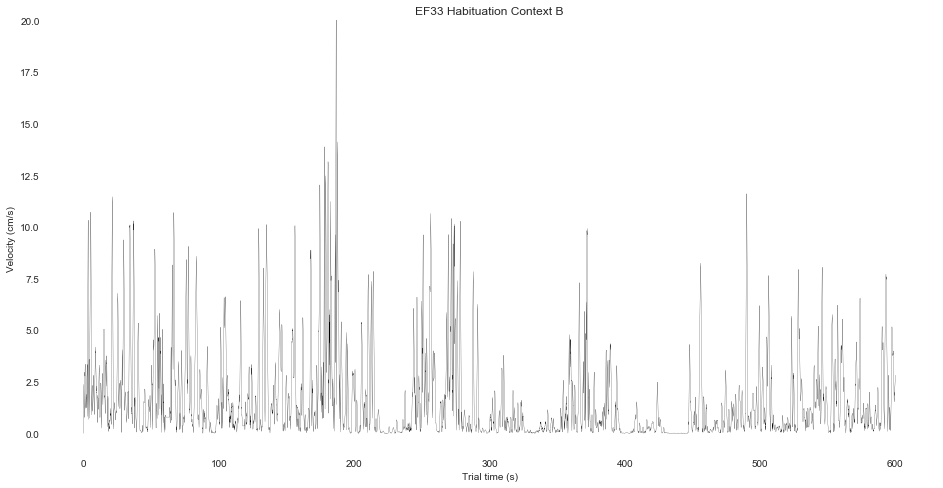

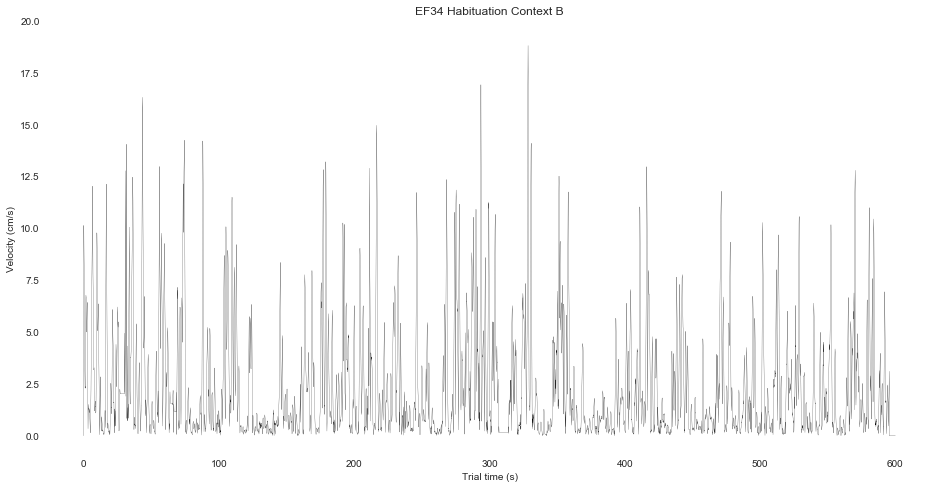

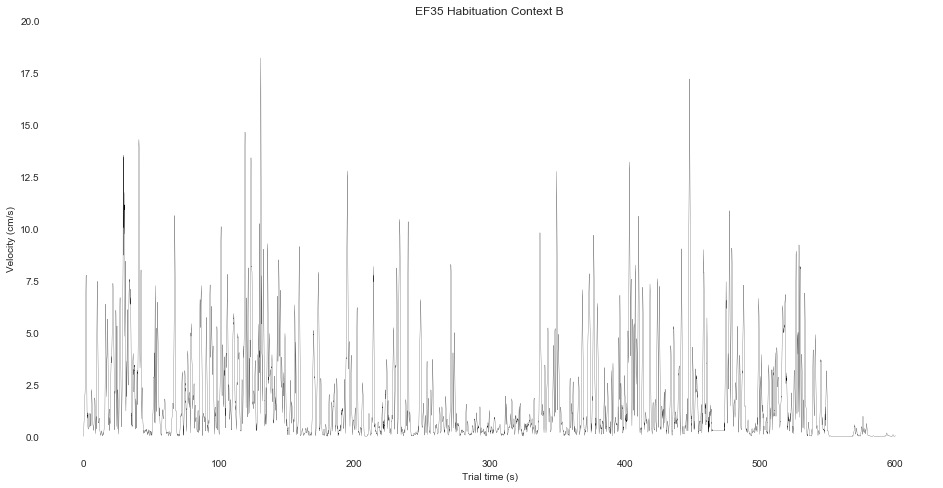

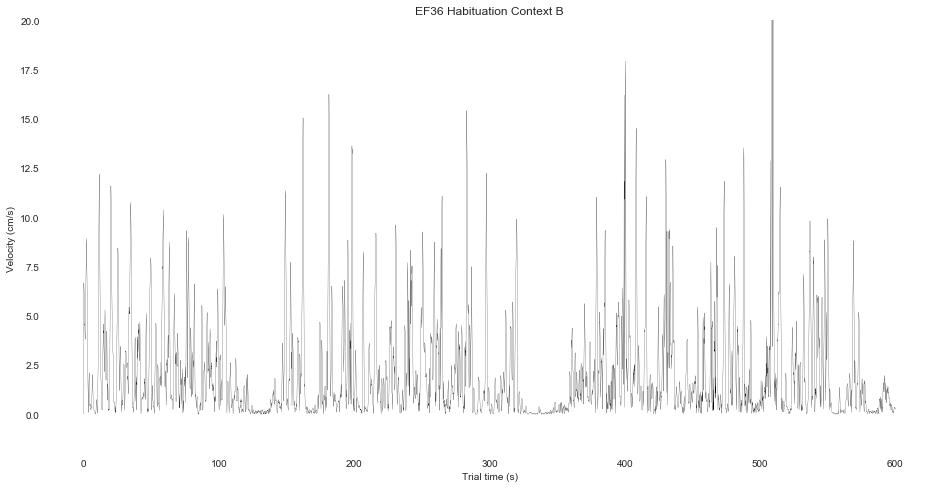

In [57]:
for sheet in sheetlist:
    ID,ctx,group,data = sr.animal_read(inpath, filename, sheet)
    
    i = group
    vels = data['Velocity']
    
    med = round(vels.median(),3)
    mean = round(vels.mean(),3)
    std = round(vels.std(),3)
    
    df = pd.DataFrame([[ID, ctx, i, mean, med, std]],index=None)
    habitOutfile = outpath + '/habituation-{}-{}.csv'
    habitOutfile = habitOutfile.format(ID,ctx[-1])
    df.to_csv(habitOutfile)
    
    plt.style.use('seaborn-white')
    plt.figure(figsize=(16,8),facecolor='white',edgecolor='white')
    
    # Plots main velocity
    plt.plot(vels,color='k',linewidth=0.2)
    
    # Plots smoothed velocity
    #f = interp1d(vels.index.values, vels.iloc[:,0])
    #xnew = np.arange(0, 600, 5)
    #ynew = f(xnew)
    #plt.plot(xnew, ynew,'r--')

    sns.despine(left=True, bottom=True, right=True)
    plt.ylim(ymax=20)
    plt.title(ID + " Habituation " + ctx)
    plt.ylabel('Velocity (cm/s)')
    plt.xlabel('Trial time (s)')

    fname = outpath + '/Compressed/habituation-plot-{}-{}'
    fname = fname.format(ctx[-1], ID)
    plt.savefig(fname, dpi=300)

# func
- import all vels within a time frame
- 

In [7]:
vels = pd.DataFrame(vels)
testvels = pd.DataFrame(vels.head(50))
freezeThresh = 1000
frozenSecs = 0

nFrames = len(vels)
nSecs = 30


count = 0

for frame in vels.iterrows():
    count +=1
    
print(count)
print(len(vels))
    #print(float(frame[1]))

8993
8993


In [ ]:
vels = pd.DataFrame(vels)
testvels = pd.DataFrame(vels.head(20))
freezeThresh = 1000
frozenSecs = 0

sec = 1
epoch = []
for frame in vels.iterrows():
    if frame[0] >= sec and frame[0] < sec + 1:
        print(frame[0])
        break
        
        velsinSec.append(float(frame[1]))    
    if np.mean(velsinSec) < freezeThresh:
        frozenSecs += 1
    sec += 1
#print(frozenSecs)
#for vel in secVels:
#if vel < 1: